# Final project - Top 50 Spotify songs by each country
## Group #4

Group Members: Sarai Kogman, Yosef Benkormono, Stav Bracha, Shaked Ziton

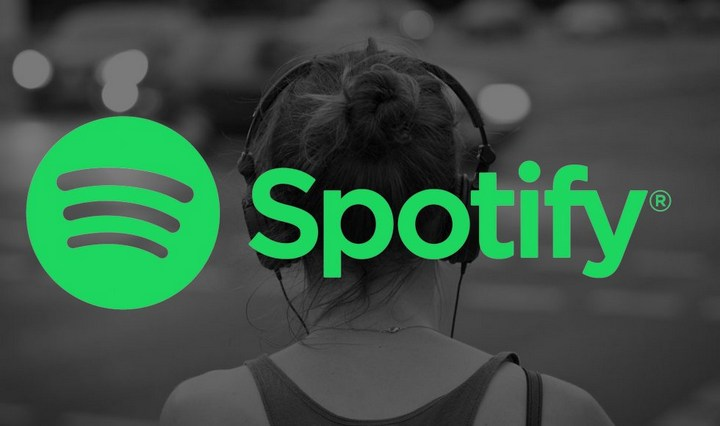

In [38]:
from IPython import display
display.Image("https://raw.githubusercontent.com/Saraikogman/New-project/main/Spotify-Logo.jpg")

# Source:


Kaggle: https://www.kaggle.com/datasets/leonardopena/top-50-spotify-songs-by-each-country

# Introduction

About our data:

The data is a collection of 50 most played songs in 50 different countries on Spotify.

The data has collected close to Christmas so it can be assumed that there is a connection between the songs and the holiday. 

The timeline of the songs from 1942 to 2019.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.core.display import HTML
 

In [4]:
top_50_df= pd.read_csv("https://raw.githubusercontent.com/Saraikogman/New-project/main/top50contry.csv", encoding='latin-1')
top_50_df

,Unnamed: 0,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
0,1,Dance Monkey,Tones and I,australian pop,2019,31/12/1969,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,2,ROXANNE,Arizona Zervas,pop rap,2019,31/12/1969,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,3,Memories,Maroon 5,pop,2019,31/12/1969,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,4,Circles,Post Malone,dfw rap,2019,31/12/1969,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,5,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,31/12/1969,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Feelings,Lauv,pop,2019,31/12/1969,103.0,47.0,69.0,-7.0,10.0,25.0,190,9.0,4.0,73,malasya
996,997,Mimpi (feat. Alif),K-Clique,malaysian indie,2019,31/12/1969,150.0,73.0,83.0,-7.0,10.0,87.0,253,53.0,29.0,66,malasya
997,998,Cinta Luar Biasa,Andmesh,indonesian pop,2019,31/12/1969,136.0,23.0,58.0,-12.0,10.0,32.0,256,81.0,3.0,66,malasya
998,999,Haa Tepok,MeerFly,malaysian hip hop,2019,31/12/1969,87.0,50.0,85.0,-12.0,15.0,68.0,211,66.0,31.0,65,malasya


# First of all we checked if we have any Null values in the data

In [7]:
top_50_df.isnull().values.any()

True

* The null's values didn't affect our data analyst. 

#### We tested a correlation of all parameters in the data

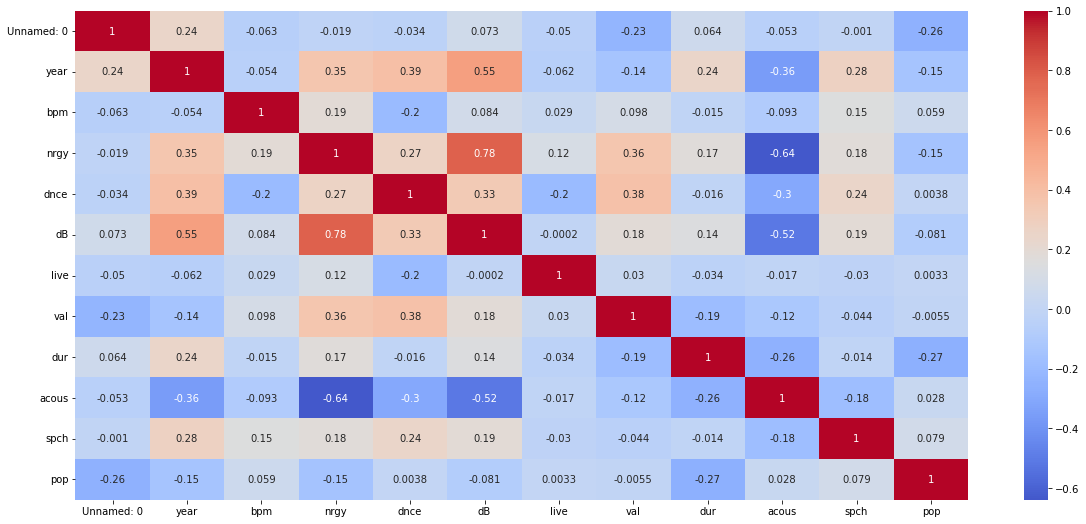

In [8]:
plt.figure(figsize=(20,9))
sns.heatmap(top_50_df.corr(), cmap='coolwarm', center=0.1555, annot = True);

#### We can see that there is a relatively strong correlation between energy and decibels, so we will examine the contact:

# conclusion1 - dB and enrgy

 ### What is a decibel?
#### A decibel (dB) is a unit of measurement for sound.
#### Decibels are an expression of the relative intensity of the sounds in the air as they are perceived by our ears.

We arranged the data file and deleted duplicate values song title.

In [9]:
corr_df = top_50_df.copy()
corr_df.drop_duplicates(subset=["title"], keep='first', inplace= True)

<AxesSubplot:xlabel='dB', ylabel='nrgy'>

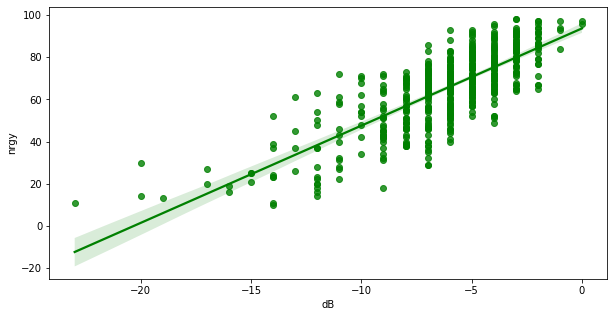

In [10]:
fig = plt.subplots(figsize=(10, 5))
sns.regplot(x='dB', y='nrgy', data= corr_df, color='green')

- Energy - The energy of a song. the higher the value, the more energtic. 
- Loudness.dB - The higher the value, the louder the song.


#### We see by the line a regression that the higher the decibel, the higher the energy of the song respectively.

# conclusion2 - the match between favorite song and top genre

We added a new column where we divided the years into decades.

In [11]:
top_50_df['decade'] = (top_50_df['year']//10)*10

In [12]:
top_50_df['count'] = 1

We made a table that shows the favorite genre every decade:

In [13]:
Top_genre_each_decade = top_50_df[['decade', 'top genre','count']]
Top_genre_each_decade = pd.DataFrame(top_50_df.groupby(['decade', 'top genre'])['count'].sum()).reset_index().rename(columns={'decade':'decade','top genre' : 'top genre','count':'count'})
Top_genre_each_decade =Top_genre_each_decade.set_index('top genre').groupby('decade')['count'].nlargest(1).index.to_frame().reset_index(drop=True)
Top_genre_each_decade

,decade,top genre
0,1940,adult standards
1,1950,adult standards
2,1960,adult standards
3,1970,adult standards
4,1980,album rock
5,1990,adult standards
6,2000,latin pop
7,2010,latin


* Adult standards (also sometimes known as the nostalgia format) is aimed at "mature" adults, meaning mainly those people over 50 years of age.

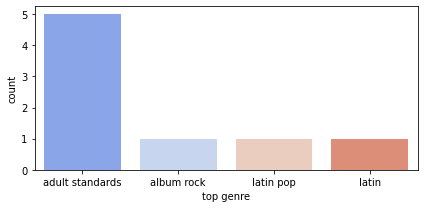

In [14]:
fig, axes = plt.subplots(figsize=(6,3))
sns.countplot(x="top genre", data=Top_genre_each_decade,palette='coolwarm')
fig.tight_layout()
plt.show()

#### We can see that the Adult Standards is the most played genre divided into decades.

We made a table that shows the favorite song every decade:

In [15]:
op_title_each_decade = top_50_df[['decade', 'title','count']]
Top_title_each_decade = pd.DataFrame(top_50_df.groupby(['decade', 'title'])['count'].sum()).reset_index().rename(columns={'decade':'decade','title' : 'title','count':'count'})
Top_title_each_decade =Top_title_each_decade.set_index('title').groupby('decade')['count'].nlargest(1).index.to_frame().reset_index(drop=True)
Top_title_each_decade

,decade,title
0,1940,White Christmas
1,1950,Blue Christmas
2,1960,It's the Most Wonderful Time of the Year
3,1970,Santa Claus Is Coming To Town
4,1980,Last Christmas
5,1990,All I Want for Christmas Is You
6,2000,Feliz Navidad
7,2010,Dance Monkey


We consolidated the data into one table with the favorite song and genre every decade.

In [16]:
Top_title_and_genre_each_decade = pd.merge(Top_title_each_decade, Top_genre_each_decade, on='decade')
Top_title_and_genre_each_decade

,decade,title,top genre
0,1940,White Christmas,adult standards
1,1950,Blue Christmas,adult standards
2,1960,It's the Most Wonderful Time of the Year,adult standards
3,1970,Santa Claus Is Coming To Town,adult standards
4,1980,Last Christmas,album rock
5,1990,All I Want for Christmas Is You,adult standards
6,2000,Feliz Navidad,latin pop
7,2010,Dance Monkey,latin


Preparation of the data frame to check whether every song of the decade belongs to the genre of the decade.

In [17]:
check_matching = top_50_df.loc[(top_50_df['title'] == 'White Christmas' ) |(top_50_df['title'] == 'Blue Christmas') | (top_50_df['title'] == "It's the Most Wonderful Time of the Year") | (top_50_df['title'] == "Santa Claus Is Coming To Town") | (top_50_df['title'] == "Last Christmas") | (top_50_df['title'] == "All I Want for Christmas Is You") | (top_50_df['title'] == "Feliz Navidad") | (top_50_df['title'] == "Dance Monkey")]
check_matching = check_matching[['title', 'top genre']].drop_duplicates()
check_matching = check_matching.reset_index(drop=True).rename(columns = {'top genre':'chack_matching'})

In [18]:
merge_data = pd.merge(Top_title_and_genre_each_decade, check_matching, left_on='title', right_on='title', how='inner')
merge_data

,decade,title,top genre,chack_matching
0,1940,White Christmas,adult standards,adult standards
1,1950,Blue Christmas,adult standards,adult standards
2,1960,It's the Most Wonderful Time of the Year,adult standards,adult standards
3,1970,Santa Claus Is Coming To Town,adult standards,adult standards
4,1980,Last Christmas,album rock,new wave pop
5,1990,All I Want for Christmas Is You,adult standards,dance pop
6,2000,Feliz Navidad,latin pop,latin pop
7,2010,Dance Monkey,latin,australian pop


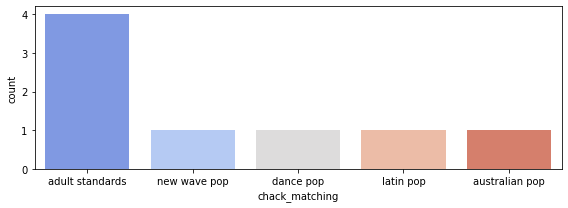

In [19]:
fig, axes = plt.subplots(figsize=(8,3))
sns.countplot(x="chack_matching", data=merge_data,palette='coolwarm')
fig.tight_layout()
plt.show()

#### We can see that the most popular song in most of the decades is also from the genre of adult standards.

We tested whether the favorite song was from the favorite genre of that decade.

To do this, we added a "match" column that indicates True/False if the favorite song is from the favorite genre.

In [20]:
merge_data['match'] = pd.DataFrame(np.where(merge_data['top genre'] == merge_data['chack_matching'], 'True', 'False'))
merge_data

,decade,title,top genre,chack_matching,match
0,1940,White Christmas,adult standards,adult standards,True
1,1950,Blue Christmas,adult standards,adult standards,True
2,1960,It's the Most Wonderful Time of the Year,adult standards,adult standards,True
3,1970,Santa Claus Is Coming To Town,adult standards,adult standards,True
4,1980,Last Christmas,album rock,new wave pop,False
5,1990,All I Want for Christmas Is You,adult standards,dance pop,False
6,2000,Feliz Navidad,latin pop,latin pop,True
7,2010,Dance Monkey,latin,australian pop,False


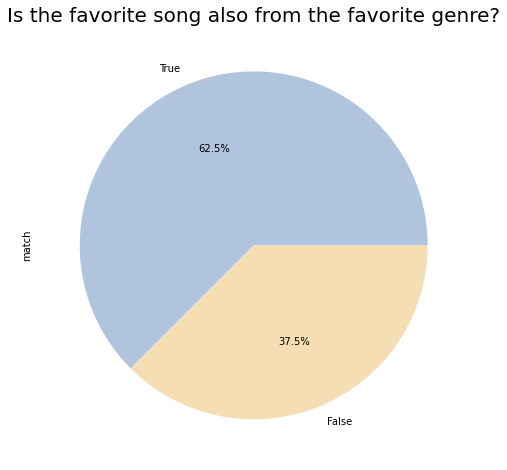

In [21]:
plt.figure(1, figsize=(8,8))
plt.title("Is the favorite song also from the favorite genre?",size=(20))
merge_data['match'].value_counts().plot.pie(autopct="%1.1f%%",  colors = ['lightsteelblue', 'wheat',"plum"])
plt.show()

#### We can see that there is usually a match between the favorite song and the favorite genre.

# conclusion3 - country and popularity

We will check what are the most popular songs by the average of their popularity:

In [22]:
title_popularity = top_50_df.groupby("title").agg([np.mean, np.size])["pop"]
title_popularity = title_popularity.sort_values(by=["mean"], ascending = False)
title_popularity1 = title_popularity.head(10).reset_index()
title_popularity1

,title,mean,size
0,Dance Monkey,100.0,17
1,ROXANNE,99.0,14
2,Circles,99.0,8
3,Memories,99.0,10
4,everything i wanted,98.0,4
5,All I Want for Christmas Is You,98.0,14
6,RITMO (Bad Boys For Life),97.0,8
7,Don't Start Now,97.0,6
8,Lose You To Love Me,97.0,2
9,Falling,96.1,10


mean= the avarge popularity of the song

size= number of times the song appeared

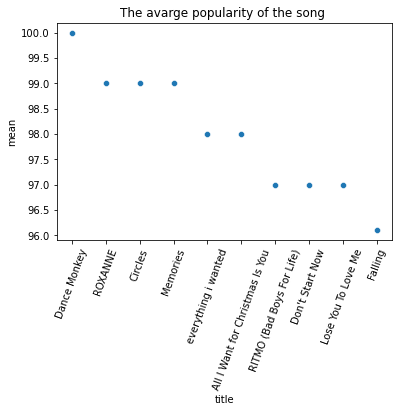

In [23]:
sns.scatterplot(data= title_popularity1, y= 'mean', x= 'title')
plt.xticks(rotation = 70)
plt.title("The avarge popularity of the song ")
plt.show()

And now we will look at who are the most played artists by the popularity average:

In [24]:
artist_popularity = top_50_df.groupby("artist").agg([np.mean, np.size])["pop"]
artist_popularity = artist_popularity.sort_values(by=["mean"], ascending = False)
artist_popularity1 = artist_popularity.head(10).reset_index()
artist_popularity1

,artist,mean,size
0,Maroon 5,99.000000,10
1,Arizona Zervas,99.000000,14
2,Tones and I,98.944444,18
3,Dua Lipa,97.000000,6
4,Selena Gomez,97.000000,2
5,Trevor Daniel,97.000000,9
6,The Black Eyed Peas,97.000000,8
7,Billie Eilish,96.888889,9
8,Post Malone,96.363636,11
9,blackbear,96.000000,2


We check what the average rating of the popularity of the artist is:

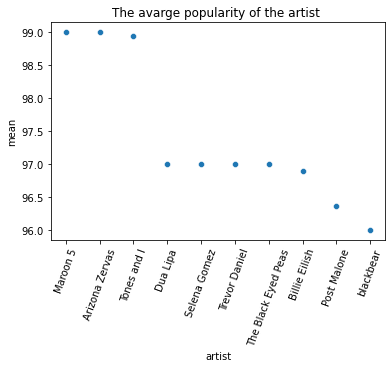

In [25]:
sns.scatterplot(data= artist_popularity1, y= 'mean', x= 'artist')
plt.xticks(rotation = 70)
plt.title("The avarge popularity of the artist ")
plt.show()

We check how many songs there are for singers that are loved on Spotify:

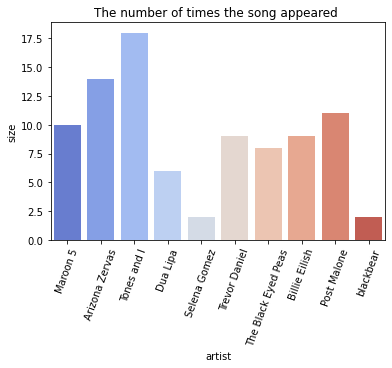

In [26]:
sns.barplot(data= artist_popularity1, y= 'size', x= 'artist', palette = "coolwarm")
plt.xticks(rotation = 70)
plt.title("The number of times the song appeared ")
plt.show()

#### However, the most beloved song is not that of the most popular singer. But you can see that the popular songs do belong to the favorite singers.

#### In addition, we can see that the most popular artists are not necessarily played the most often on Spotify.

We check the popularity of songs by countries:

In [27]:
country_data = top_50_df.groupby("country").agg([np.mean])["pop"]
country_data

,mean
country,
africa,78.68
argentina,83.14
australia,85.20
belgium,87.96
bolivia,87.30
brazil,79.90
canada,86.36
chile,85.34
colombia,74.90


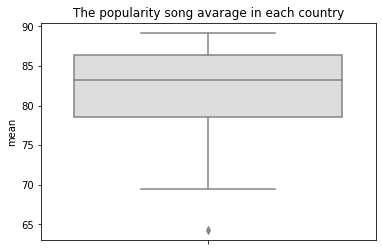

In [28]:
sns.boxplot(data=country_data, y='mean', palette = "coolwarm")
plt.title('The popularity song avarage in each country')
plt.show()

In [29]:
Top_genre_each_decade = top_50_df[['decade', 'top genre','count']]
Top_genre_each_decade = pd.DataFrame(top_50_df.groupby(['decade', 'top genre'])['count'].sum()).reset_index().rename(columns={'decade':'decade','top genre' : 'top genre','count':'count'})
Top_genre_each_decade =Top_genre_each_decade.set_index('top genre').groupby('decade')['count'].nlargest(1).index.to_frame().reset_index(drop=True)
Top_genre_each_decade

,decade,top genre
0,1940,adult standards
1,1950,adult standards
2,1960,adult standards
3,1970,adult standards
4,1980,album rock
5,1990,adult standards
6,2000,latin pop
7,2010,latin


* We worked in google colab area with geopandas library and we couldent run seborn and geopandas togther in jupiter leb. 



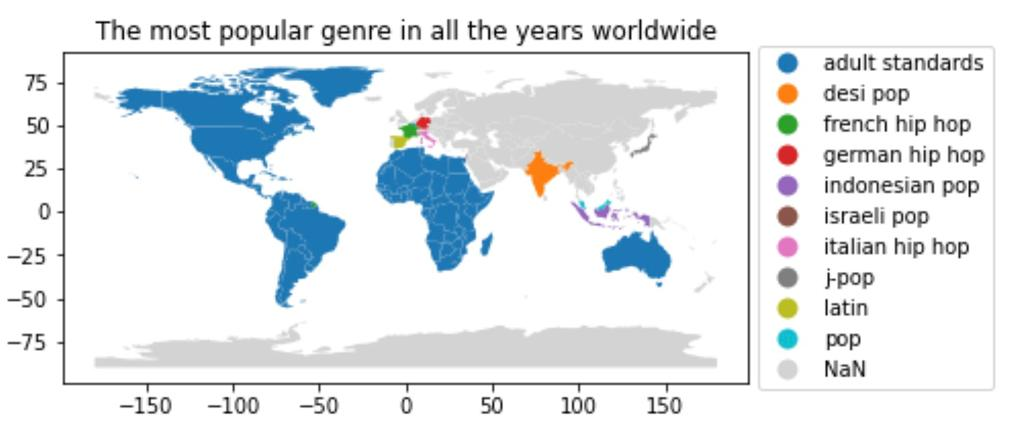

In [30]:
display.Image("https://raw.githubusercontent.com/Saraikogman/New-project/main/ad51f0a5-1823-46f8-a2c2-74ce207dcf90.jpg")

### And what did you think, that we forgot Israel?

We make a new table in which we only have the 50 songs and genres in Israel.

In [31]:
israel_df=top_50_df[['country',"artist","top genre"]]
israel_df1= israel_df.loc[israel_df['country'] == "israel"]
israel_df1

,country,artist,top genre
800,israel,Tones and I,australian pop
801,israel,Arizona Zervas,pop rap
802,israel,Maroon 5,pop
803,israel,Post Malone,dfw rap
804,israel,Billie Eilish,electropop
805,israel,Trevor Daniel,alternative r&b
806,israel,Dua Lipa,dance pop
807,israel,Billie Eilish,electropop
808,israel,Lewis Capaldi,pop
809,israel,Travis Scott,rap


We check the number of songs of Israeli artists versus foreign artists.

In [32]:
israeli_artist = israel_df1[israel_df1['top genre'].str.contains("israeli")]
y=israeli_artist['top genre'].count()
israeli_artist.count()

country      32
artist       32
top genre    32
dtype: int64

In [33]:
foreign_artist= israel_df1[israel_df1["top genre"].str.contains("israeli")==False]
x=len(foreign_artist)
foreign_artist.count()

country      18
artist       18
top genre    18
dtype: int64

In [34]:
isr_singers_df=pd.DataFrame()
data = ['israeli artist','foreign artist']
isr_singers_df = pd.DataFrame(data, columns=['nationality'])
isr_singers_df['count']=[y,x]
isr_singers_df

,nationality,count
0,israeli artist,32
1,foreign artist,18


Text(0.5, 1.0, 'Israeli artist versus foreign_artist')

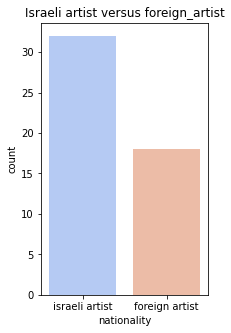

In [35]:
fig, axes = plt.subplots(figsize=(3, 5))
sns.barplot( x="nationality",y='count',data=isr_singers_df, palette = "coolwarm")
plt.title('Israeli artist versus foreign_artist')


We showed how many songs each Israeli artist has:

In [36]:
pop_israeli_artist=israeli_artist.copy()
pop_israeli_artist['count']=pop_israeli_artist.groupby('artist')['artist'].transform('count')
pop_israeli_artist.groupby('artist')
pop_israeli_artist.drop_duplicates(subset=["artist"], keep='last',inplace=True)
pop_israeli_artist.sort_values(by=['count'],  ascending = False,inplace=True)
pop_israeli_artist

,country,artist,top genre,count
840,israel,Ishay Ribo,israeli pop,4
844,israel,Eden Hason,israeli mediterranean,4
841,israel,Nathan Goshen,israeli pop,3
820,israel,Dennis Lloyd,israeli pop,3
828,israel,Omer Adam,israeli mediterranean,2
842,israel,Hanan Ben Ari,israeli pop,2
843,israel,Benaia Barabi,israeli mediterranean,2
848,israel,Itay Levi,israeli mediterranean,2
829,israel,Eden Ben Zaken,israeli mediterranean,1
830,israel,Eyal Golan,israeli mediterranean,1


Text(0.5, 1.0, 'The number of songs for every artist ')

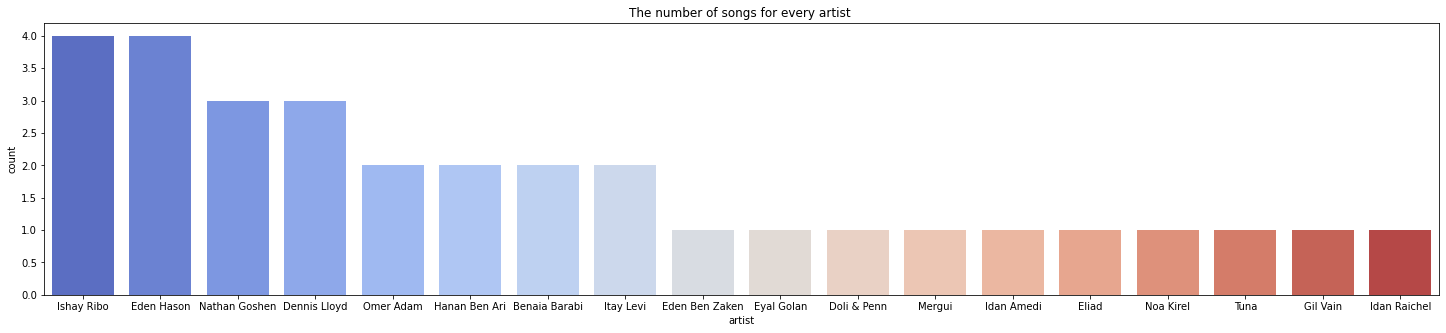

In [37]:
fig, axes = plt.subplots(figsize=(25, 5))
sns.barplot(x='artist',y='count',data=pop_israeli_artist, palette = "coolwarm")
plt.title('The number of songs for every artist ')

### So it turns out, that Omer Adam is not the most played singer in Israel

## We represent the code from google colab for the map in conclusion 3: 


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

world['continent'] = world['continent'].str.lower()

world['name'] = world['name'].str.lower()

world['name'] = np.where(world['continent'] == 'north america', 'usa', world['name'])

world['name'] = np.where(world['continent'] == 'south america', 'usa', world['name'])

world['name'] = np.where(world['continent'] == 'africa', 'africa', world['name'])

world['name'] = np.where(world['name'] == 'malaysia', 'malasya', world['name'])

world = pd.merge(world, Top_genre_each_country, left_on='name', right_on='country', how='left')


ax = world.plot(column='top genre', missing_kwds={'color': 'lightgrey'},categorical=True, legend=True, legend_kwds={'loc': 'center 

left', 'bbox_to_anchor':(1,0.5),'fmt': "{:.0f}"})

ax.set_title('The most popular genre in all the years worldwide')

plt.plot()